In [661]:
import warnings
warnings.filterwarnings('ignore')

In [670]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100);

<Figure size 800x600 with 0 Axes>

In [671]:
#Import the data using pandas
db= pd.read_csv('Desktop/freightdb.csv')

In [672]:
db.head(10)

,DATE,VALID_TILL,ORIGIN_CONTINENT,POL,POL_COUNTRY,POL_REGION,POD,POD_COUNTRY,POD_CONTINENT,SHIPPING_LINES,20FT_RATE(USD),40FT_RATE (USD),TRANSIT_TIME(DAYS)
0,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,676.76,1126.80,NaN
1,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Hapag Lloyd,733.44,1126.80,NaN
2,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Hapag Lloyd,700.00,1142.00,NaN
3,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Maersk,991.00,1502.02,NaN
4,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Maersk,517.00,807.00,NaN
5,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,Maersk,364.00,730.00,NaN
6,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Qingdao,China,ASIA,Maersk,174.00,373.00,NaN
7,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Maersk,398.00,319.00,NaN
8,2020-03-23,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,CMA CGM,700.00,1200.00,NaN
9,2020-07-04,2020-04-24,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,589.97,962.23,NaN


In [673]:
#Convert the 'rates' columns to Numeric
cols=['20FT_RATE(USD)','40FT_RATE (USD)']
db[cols]=db[cols].apply(pd.to_numeric,axis=1)

In [674]:
#Convert the 'Date' column to date data type
db['DATE']=pd.to_datetime(db['DATE'])
db.dtypes

DATE                  datetime64[ns]
VALID_TILL                    object
ORIGIN_CONTINENT              object
POL                           object
POL_COUNTRY                   object
POL_REGION                    object
POD                           object
POD_COUNTRY                   object
POD_CONTINENT                 object
SHIPPING_LINES                object
20FT_RATE(USD)               float64
40FT_RATE (USD)              float64
TRANSIT_TIME(DAYS)           float64
dtype: object

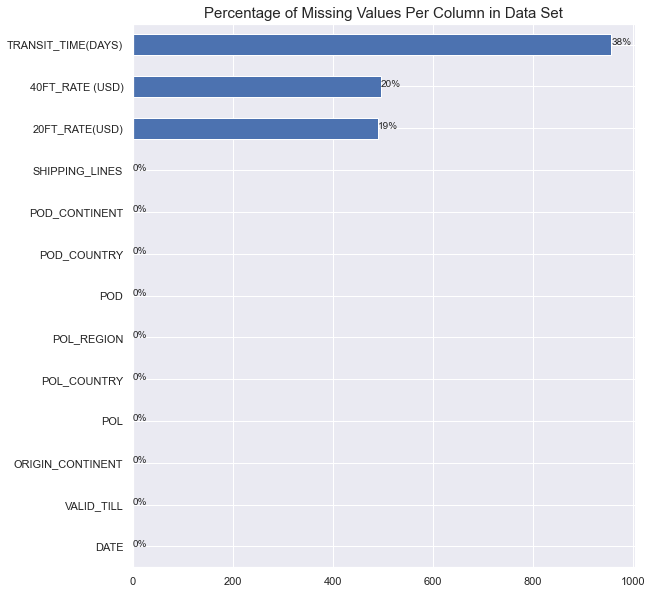

In [675]:
# Check if there are  missing values in the dataset
ax = db.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Data Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/db.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [676]:
#Remove rows that have more than one null or missing values
db=db.dropna(axis = 0,thresh=12)

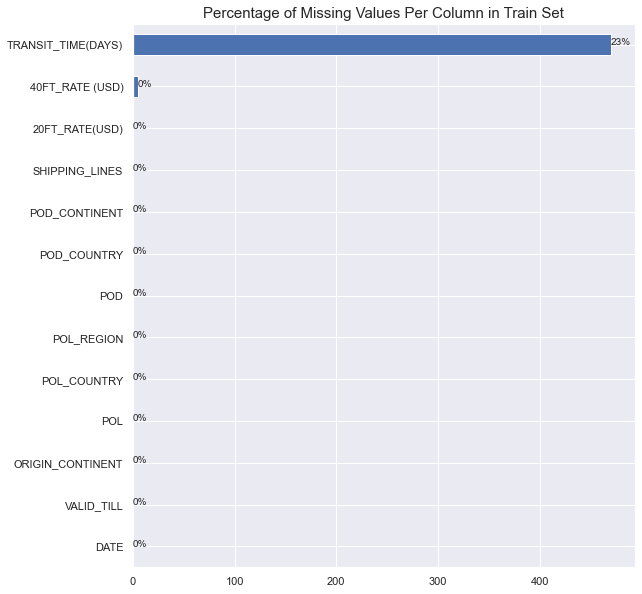

In [677]:
# Check if there any missing values in the dataset
ax = db.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/db.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [678]:
#Get the period from date column
db['DATE(QUATER)'] = pd.PeriodIndex(db['DATE'],freq='Q')

In [679]:
db['DATE(QUATER)'].value_counts()

2020Q4    985
2020Q3    788
2020Q2    260
2020Q1      9
Freq: Q-DEC, Name: DATE(QUATER), dtype: int64

In [681]:
#Move the DATE(QUATER) column close to the Date Column
dbb=db.pop("DATE(QUATER)")
db.insert(1,"DATE(QUATER)",dbb)
db.head(10)

,DATE,DATE(QUATER),VALID_TILL,ORIGIN_CONTINENT,POL,POL_COUNTRY,POL_REGION,POD,POD_COUNTRY,POD_CONTINENT,SHIPPING_LINES,20FT_RATE(USD),40FT_RATE (USD),TRANSIT_TIME(DAYS)
0,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,676.76,1126.80,NaN
1,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Hapag Lloyd,733.44,1126.80,NaN
2,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Hapag Lloyd,700.00,1142.00,NaN
3,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Maersk,991.00,1502.02,NaN
4,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Maersk,517.00,807.00,NaN
5,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,Maersk,364.00,730.00,NaN
6,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Qingdao,China,ASIA,Maersk,174.00,373.00,NaN
7,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Maersk,398.00,319.00,NaN
8,2020-03-23,2020Q1,2020-06-04,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,CMA CGM,700.00,1200.00,NaN
9,2020-07-04,2020Q3,2020-04-24,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,589.97,962.23,NaN


In [682]:
#Calculate the average rate using the '40FT_RATE (USD)','20FT_RATE(USD)' columns
db['AVERAGE_RATE(USD)']= db[['40FT_RATE (USD)','20FT_RATE(USD)']].mean(axis=1)

## Q1) What continent had the highest average freight rate ex Africa in  2020

In [683]:
db_africa=db[(db['ORIGIN_CONTINENT']=='AFRICA') ]
db_africa.groupby('POD_CONTINENT')[['AVERAGE_RATE(USD)']].mean()

,AVERAGE_RATE(USD)
POD_CONTINENT,
AFRICA,1465.959814
ASIA,624.941772
EUROPE,901.735236


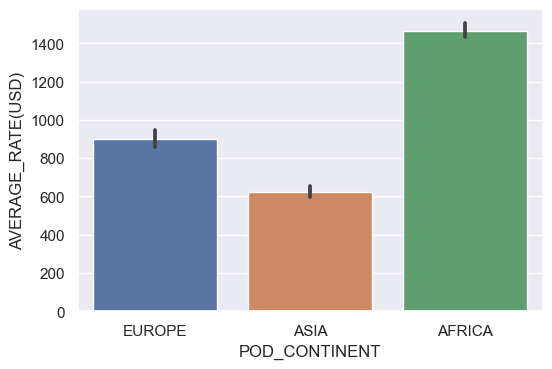

In [685]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':80})
ax=sns.barplot(x='POD_CONTINENT', y= 'AVERAGE_RATE(USD)',data =db_africa)
ax.set_ylabel('AVERAGE_RATE(USD)');
ax.set_xlabel('POD_CONTINENT');


## 2) What were the top 3 destinations with the highest freight rate for the last quarter of 2020? How does it compare to the second quarter of the same year?

In [687]:
db.pivot_table(index='POD_COUNTRY', columns='DATE(QUATER)',
                               aggfunc={'AVERAGE_RATE(USD)':'mean'})

AVERAGE_RATE(USD)                                       
DATE(QUATER)              2020Q1       2020Q2       2020Q3       2020Q4
POD_COUNTRY                                                            
Cameroon                     NaN          NaN  1705.329559  1679.334722
China                    273.500   376.532258   501.976562   581.723175
Egypt                        NaN  1126.507187  1264.773182  1331.559737
Germany                  796.060   837.531607   900.846667   936.347045
Ghana                        NaN  1133.642857  1329.379672  1339.231746
India                    748.500   456.080645   598.137681   665.212200
Ivory coast                  NaN          NaN  1362.792857  1354.637727
Kenya                        NaN  1466.156250  1672.364407  1737.936818
Liberia                      NaN          NaN  2320.152059  2365.723824
Netherland              1074.145   798.624464   870.991917   886.377500
Nigeria                      NaN  1556.066667  1641.194035  1813.835000
South Africa                 NaN  1148.750000  1406.035088  1545.286552
Togo                         NaN  1947.208333  1730.487386  1683.775000
UAE                          NaN          NaN   681.804348   751.067029
United Kingdom               NaN          NaN  1043.633750  1057.241771
Vietnam                  639.750   517.879310   638.089552   719.977986

###### The top three destinations with the highest freight rate for the last quarter of 2020 were Liberia,Nigeria and Kenya.
###### For Liberia , there was a significant difference between the Q4 and the Q2 rate of 2020,while for Nigeria and kenya the difference
###### was less than %10

## 3) Which shipping line has the highest Intra African rate? Would you recommend it to a potential shipper considering its transit time?

In [688]:
db_afr=db[(db['ORIGIN_CONTINENT']=='AFRICA') & (db['POD_CONTINENT']=='AFRICA')]
db_afr.pivot_table(index='SHIPPING_LINES',
                               aggfunc={'TRANSIT_TIME(DAYS)':'mean', 'AVERAGE_RATE(USD)':'mean'})

,AVERAGE_RATE(USD),TRANSIT_TIME(DAYS)
SHIPPING_LINES,,
CMA CGM,1676.532462,34.300505
Hapag Lloyd,995.248978,33.452555
MAERSK,1429.404654,38.575301
Maersk,1464.678520,36.375000


##### CMA CGM has the highest intra Africa rate but i would recommend Hapag Lloyd which has a lower rate and the lowest transist time 

## 4) Which route experienced the biggest freight rate increase within the timeframe of the analysis?

In [689]:
db['DATE(QUATER)']=db['DATE(QUATER)'].astype(str)


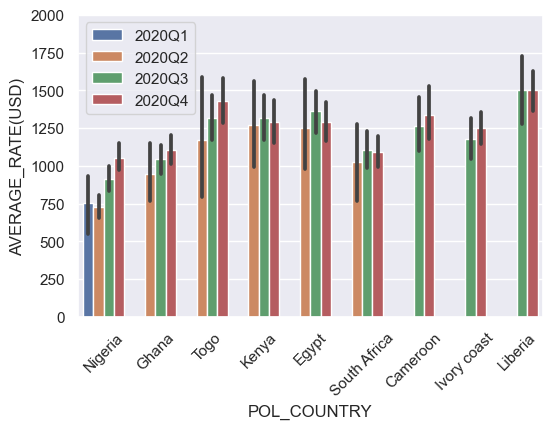

In [691]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
ax=sns.barplot(x='POL_COUNTRY', y= 'AVERAGE_RATE(USD)',data =db_africa, hue="DATE(QUATER)",
               hue_order = ['2020Q1', '2020Q2', '2020Q3','2020Q4'])
ax.set_ylabel('AVERAGE_RATE(USD)');
ax.set_xlabel('POL_COUNTRY');
plt.legend(loc='upper left');
ax.set(ylim=(0,2000));
plt.xticks(rotation=45);


## 5)What are the main differences in freight rate patterns across the different shipping lines?

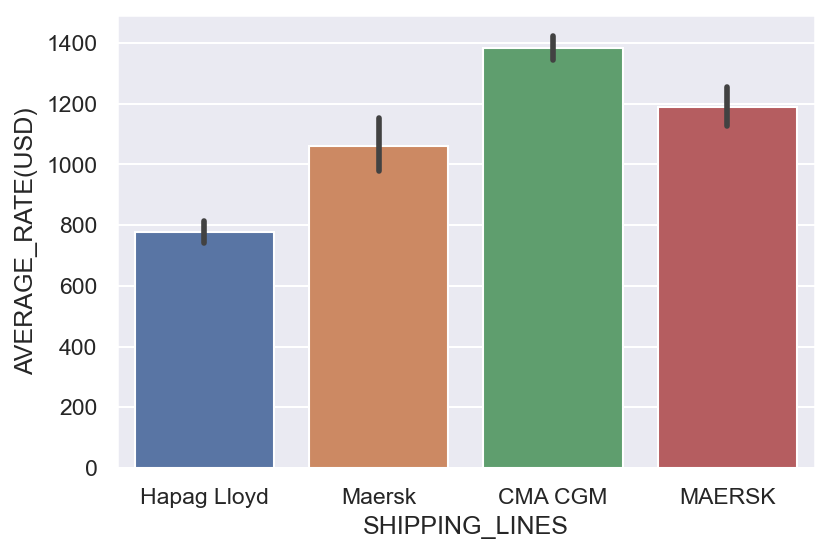

In [692]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':100})
ax=sns.barplot(x='SHIPPING_LINES', y= 'AVERAGE_RATE(USD)',data =db_africa)
ax.set_ylabel('AVERAGE_RATE(USD)');
ax.set_xlabel('SHIPPING_LINES');
plt.savefig('Desktop/f1.png',bbox_inches='tight')